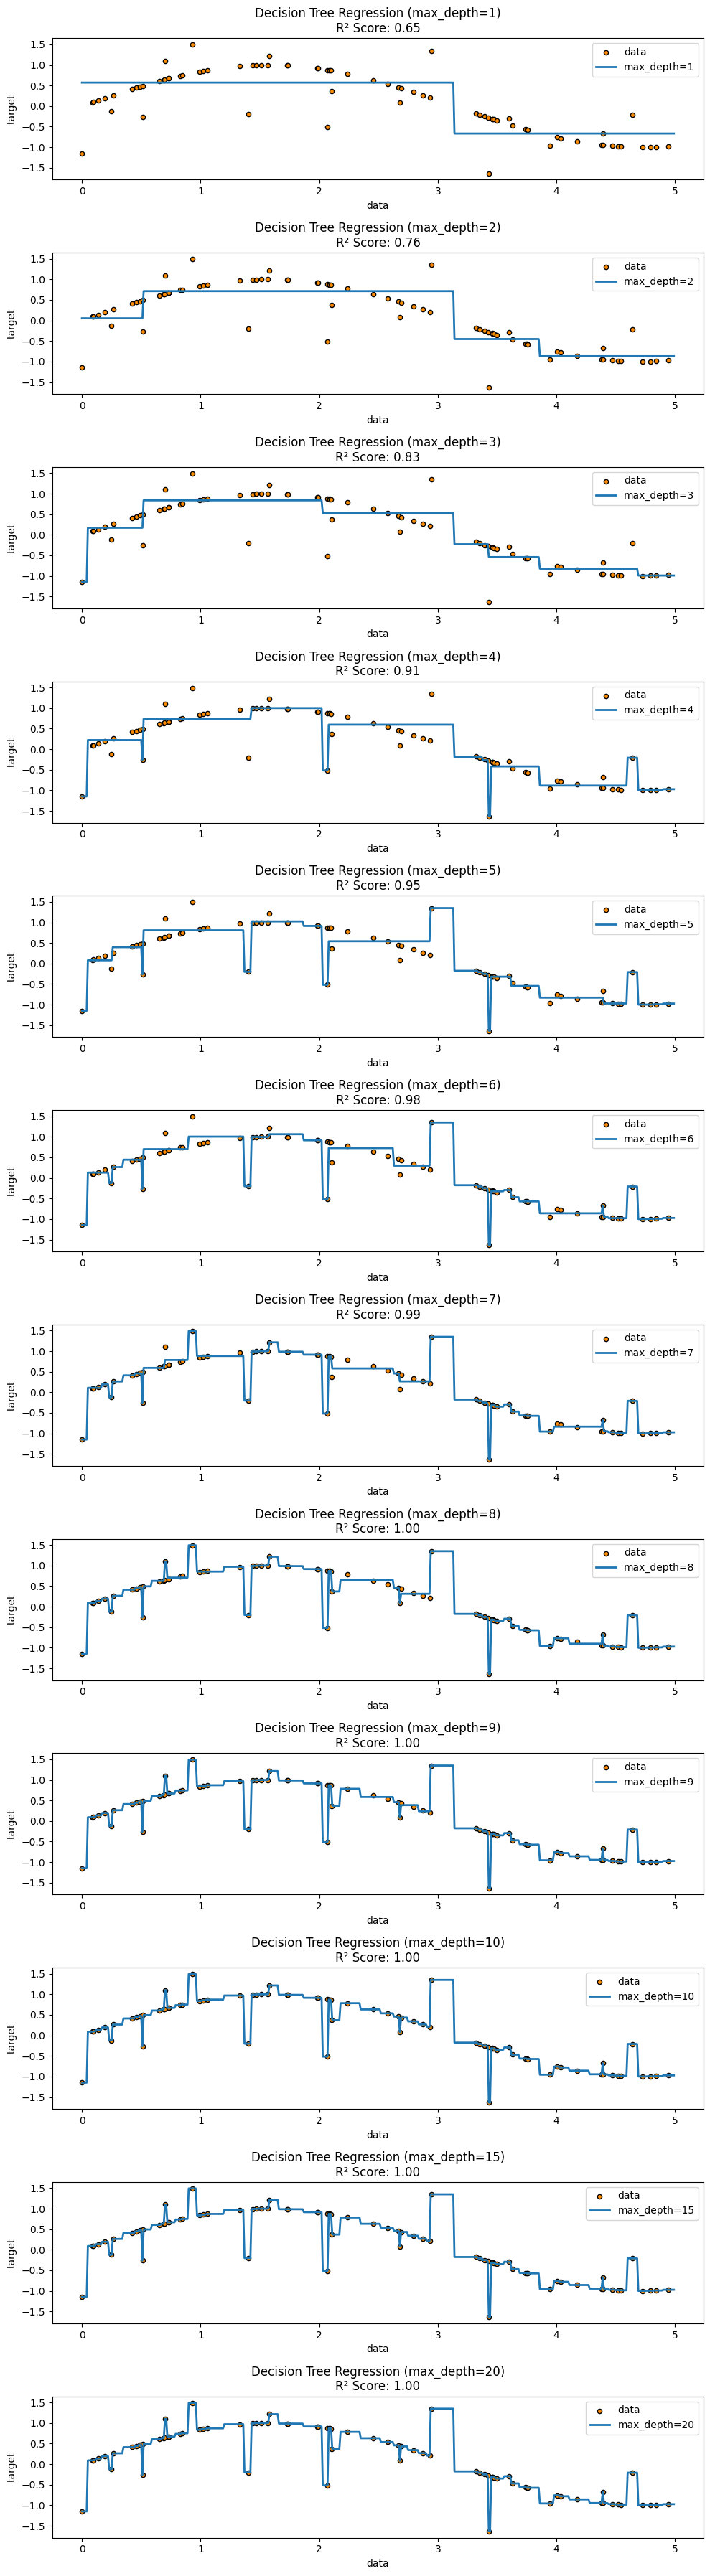

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

max_depths = [1,2,3,4,5,6,7,8,9,10,15,20]

models = {}
predictions = {}
accuracies = {}

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X, y)
    models[depth] = model
    predictions[depth] = model.predict(X_test)
    accuracies[depth] = r2_score(y, model.predict(X))

fig, axs = plt.subplots(len(max_depths), figsize=(10, len(max_depths) * 3))

for i, depth in enumerate(max_depths):
    axs[i].scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
    axs[i].plot(X_test, predictions[depth], label=f"max_depth={depth}", linewidth=2)
    axs[i].set_xlabel("data")
    axs[i].set_ylabel("target")
    axs[i].legend()
    axs[i].set_title(f"Decision Tree Regression (max_depth={depth})\nR² Score: {accuracies[depth]:.2f}")

plt.tight_layout()
plt.show()